In [47]:
# Overall Stats:
# All Variables: 92.17%
# has_cert: 84.2%
# longevity: 86.98%
# valid_cert: 84.2%
# cert_age: 87.7%
# multi_mtn: 84.2%

In [48]:
# The below was heavily inspired by
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
# and Damien's previous work on developing a Random Forrest Classifier. 

import pandas as pd # Needed for iloc.
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
# Reading the data from the provided csv. 
rawdata = pd.read_csv(r"C:\Users\jft2456\Desktop\PrePracticum\certificate_features_consolidated.csv")
rawdata.head()

,domain,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,type,globalsign nv-sa,google inc,...,fiorettigioielli.it,wponabudget.com,reviews-by.ml,sewaknepal.org,watchvslivestreamtv.club,nehanaxane.ga,alexis-collins10.tk,laborindonesia.com,egdemo.info,theflatbellydrink.com
0,01100111011001010110010101101011.info,True,1098,True,False,305,False,alexa,0,0,...,0,0,0,0,0,0,0,0,0,0
1,012global.com,True,707,True,False,266,True,alexa,0,0,...,0,0,0,0,0,0,0,0,0,0
2,09017wsa.000webhostapp.com,True,1095,True,False,478,False,phish,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0boticario.gq,True,190,True,False,2,True,phish,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0day.kiev.ua,True,89,True,False,25,False,alexa,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Changing the rawdata type so that we receive true/false values in the reshaped array. 
# False values are known phishing URLs.  True values are known good values from Alexa Internet Rankings. 
rawdata.type = (rawdata.type == "alexa")

In [51]:
rawdata.head()

,domain,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,type,globalsign nv-sa,google inc,...,fiorettigioielli.it,wponabudget.com,reviews-by.ml,sewaknepal.org,watchvslivestreamtv.club,nehanaxane.ga,alexis-collins10.tk,laborindonesia.com,egdemo.info,theflatbellydrink.com
0,01100111011001010110010101101011.info,True,1098,True,False,305,False,True,0,0,...,0,0,0,0,0,0,0,0,0,0
1,012global.com,True,707,True,False,266,True,True,0,0,...,0,0,0,0,0,0,0,0,0,0
2,09017wsa.000webhostapp.com,True,1095,True,False,478,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0boticario.gq,True,190,True,False,2,True,False,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0day.kiev.ua,True,89,True,False,25,False,True,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Selecting the desired rows (excluding site, scrape_time, and path).
X = rawdata.iloc[:,2:7].values  # Dependent variables. 
y = rawdata.iloc[:,7:8].values  # Response variable (aleax, or not phish, and phish). 

# Reshaping into a flat array to allow processing.
y.reshape((8398,))

array([ True,  True, False, ...,  True,  True,  True])

In [53]:
y.shape

(8398, 1)

In [54]:
# Splitting the training and testing data sets. 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.17%


C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
# NOTE: The colums in the wc.csv file were moved to allow values in the same feature category to be considered together. 
# No content was changed. 

In [83]:
# has_cert 


# Selecting the desired row (only avg_cyc_complexity).
X = rawdata.iloc[:,1:2].values
y = rawdata.iloc[:,7:8].values

# Reshaping into a flat array to allow processing.
y.reshape((8398,))

array([ True,  True, False, ...,  True,  True,  True])

In [84]:
# Splitting the training and testing data sets. 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.20%


In [85]:
# longevity 


# Selecting the desired rows (only external_count and avg_external_script_block).
X = rawdata.iloc[:,2:3].values
y = rawdata.iloc[:,7:8].values

# Reshaping into a flat array to allow processing.
y.reshape((8398,))

array([ True,  True, False, ...,  True,  True,  True])

In [86]:
# Splitting the training and testing data sets. 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.98%


In [87]:
# valid_cert 


# Selecting the desired row (only library_code_count).
X = rawdata.iloc[:,3:4].values
y = rawdata.iloc[:,7:8].values

# Reshaping into a flat array to allow processing.
y.reshape((8398,))

array([ True,  True, False, ...,  True,  True,  True])

In [88]:
# Splitting the training and testing data sets. 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.20%


In [89]:
# extended_validation


# Selecting the desired rows (only inline_count and avg_inline_script_block).
X = rawdata.iloc[:,4:5].values
y = rawdata.iloc[:,7:8].values

# Reshaping into a flat array to allow processing.
y.reshape((8398,))

array([ True,  True, False, ...,  True,  True,  True])

In [90]:
# Splitting the training and testing data sets. 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.20%


In [91]:
# cert_age


# Selecting the desired rows (only inline_count and avg_inline_script_block).
X = rawdata.iloc[:,5:6].values
y = rawdata.iloc[:,7:8].values

# Reshaping into a flat array to allow processing.
y.reshape((8398,))

array([ True,  True, False, ...,  True,  True,  True])

In [92]:
# Splitting the training and testing data sets. 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.70%


In [93]:
# multi_mtn (Valid on multiple 2-level domain names)


# Selecting the desired rows (only inline_count and avg_inline_script_block).
X = rawdata.iloc[:,6:7].values
y = rawdata.iloc[:,7:8].values

# Reshaping into a flat array to allow processing.
y.reshape((8398,))

array([ True,  True, False, ...,  True,  True,  True])

In [94]:
# Splitting the training and testing data sets. 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.20%


In [66]:
# Function for producing logarithmic scales of inputted phishing data. 
def figure_1(y,X):
    
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # Creating lists to store values for boxplots
    alexa_values = []
    phish_values = []
    for i in range(len(y)):
        if y[i] == True:
            alexa_values.append(float(X[i]))
        else:
            phish_values.append(float(X[i]))

    # Inputting extremely small value to substitute for 0 so that we can use log
    for j in alexa_values:
        if j == 0:
            j += 10**-10
    
    for k in phish_values:
        if k == 0:
            k += 10**-10
    
    # Creating boxplots for both alexa and phish values.  
    # I'm using the log of each list to replicate paper (i.e., y axis of Count (Logarithmic Scale))
    fig = plt.figure(figsize=(18, 6))

    ax = plt.subplot(1, 3, 1)
    ax.boxplot(np.log(alexa_values))
    ax.set_title('Alexa')

    ax = plt.subplot(1, 3, 2)
    ax.boxplot(np.log(phish_values))
    ax.set_title('Phish')

    plt.show()

C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__

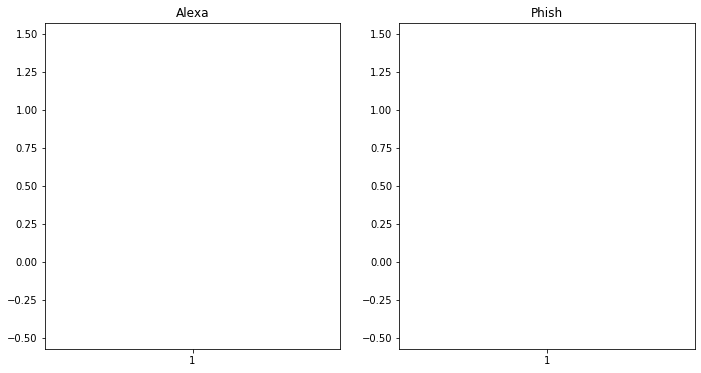

In [67]:
# Inline Blocks (inline_count)

X = rawdata.iloc[:,4:5].values
y = rawdata.iloc[:,16].values

figure_1(y,X)

C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


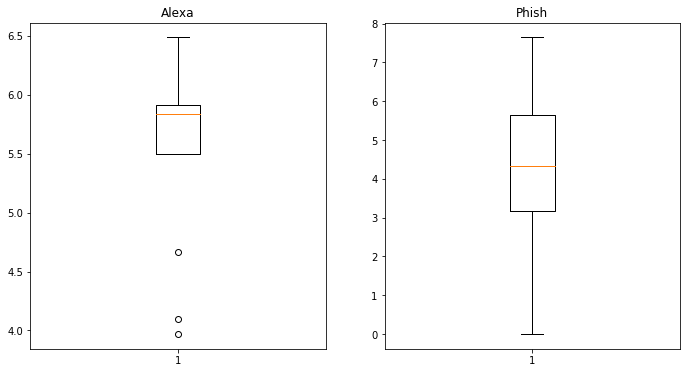

In [68]:
# Inline Blocks (avg_inline_script_block - This one doesn't work well)

X = rawdata.iloc[:,5:6].values
y = rawdata.iloc[:,16].values

figure_1(y,X)

C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.

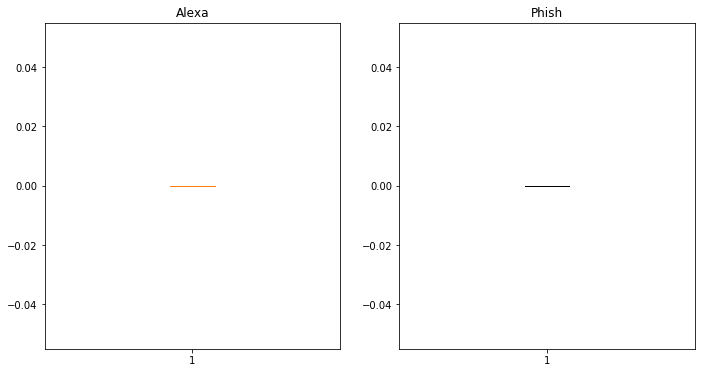

In [69]:
# External Blocks (external_count)

X = rawdata.iloc[:,6:7].values
y = rawdata.iloc[:,16].values

figure_1(y,X)

C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.

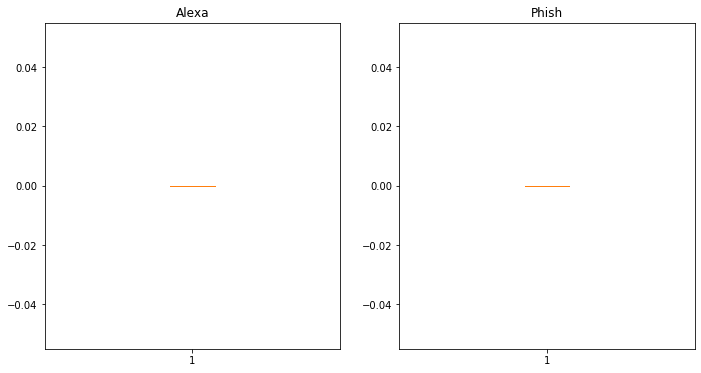

In [70]:
# External Blocks (avg_external_script_block)

X = rawdata.iloc[:,7:8].values
y = rawdata.iloc[:,16].values

figure_1(y,X)

C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__

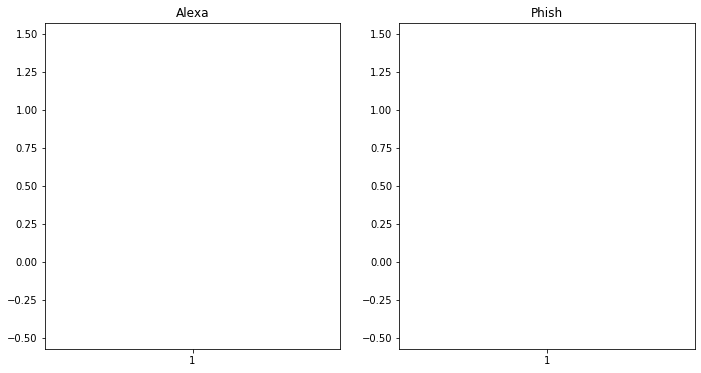

In [71]:
# Cyclomatic Complexity (avg_cyc_complexity)

X = rawdata.iloc[:,14:15].values
y = rawdata.iloc[:,16].values

figure_1(y,X)

C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\jft2456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__

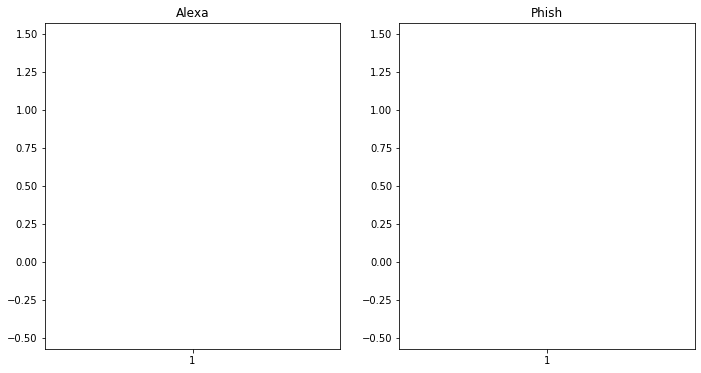

In [72]:
# LOC for library files (library_code_count)

X = rawdata.iloc[:,15:16].values
y = rawdata.iloc[:,16].values

figure_1(y,X)